In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('dfm.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,Unnamed: 0.1,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY,DAY,MONTH,MONTH_AB
0,11,2018-01-01,United Airlines,Chicago,Cleveland,4,121.0,24.0,4,1,8.0,4,129.0,72.0,80.0,48.0,316.0,0.0,1,1,Jan
1,14,2018-01-01,United Airlines,Chicago,Burlington,4,76.0,14.0,4,1,5.0,1,73.0,121.0,118.0,99.0,763.0,11.0,1,1,Jan
2,15,2018-01-01,United Airlines,Orlando,Los Angeles,2,54.0,14.0,2,2,22.0,2,55.0,337.0,338.0,302.0,2218.0,0.0,1,1,Jan
1351279,7213417,2018-12-31,American Airlines,Des Moines,Phoenix,2,0.0,28.0,2,2,33.0,2,16.0,219.0,235.0,174.0,1149.0,0.0,31,12,Dec
1351280,7213429,2018-12-31,American Airlines,Charlotte,Detroit,3,48.0,15.0,3,4,11.0,4,33.0,116.0,101.0,75.0,500.0,0.0,31,12,Dec
1351281,7213433,2018-12-31,American Airlines,Philadelphia,Charlotte,1,14.0,39.0,1,2,4.0,2,29.0,104.0,119.0,76.0,449.0,0.0,31,12,Dec


In [3]:
df1.shape

(1351282, 21)

In [4]:
df1.isna().sum()

Unnamed: 0.1           0
FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
WEATHER_DELAY          0
DAY                    0
MONTH                  0
MONTH_AB               0
dtype: int64

In [5]:
df1.columns

Index(['Unnamed: 0.1', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WEATHER_DELAY', 'DAY',
       'MONTH', 'MONTH_AB'],
      dtype='object')

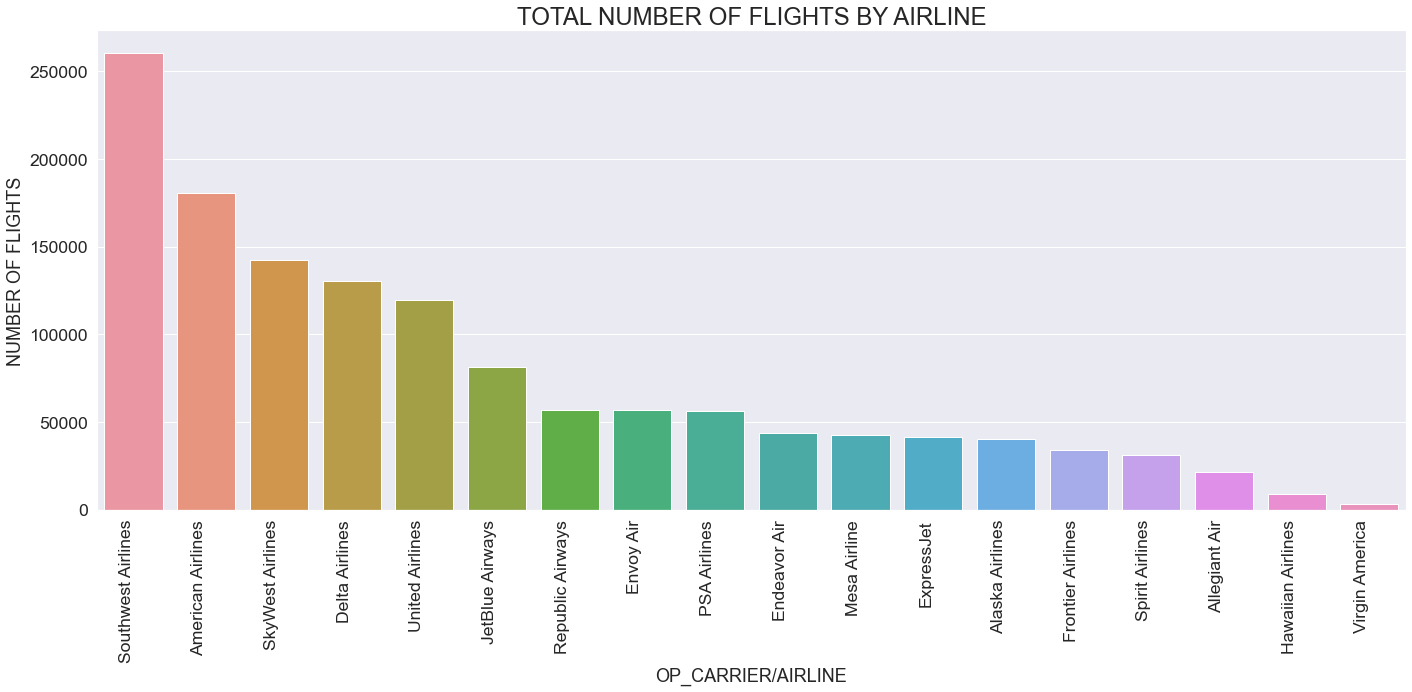

In [6]:
#Total Number of Flights per Airline
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

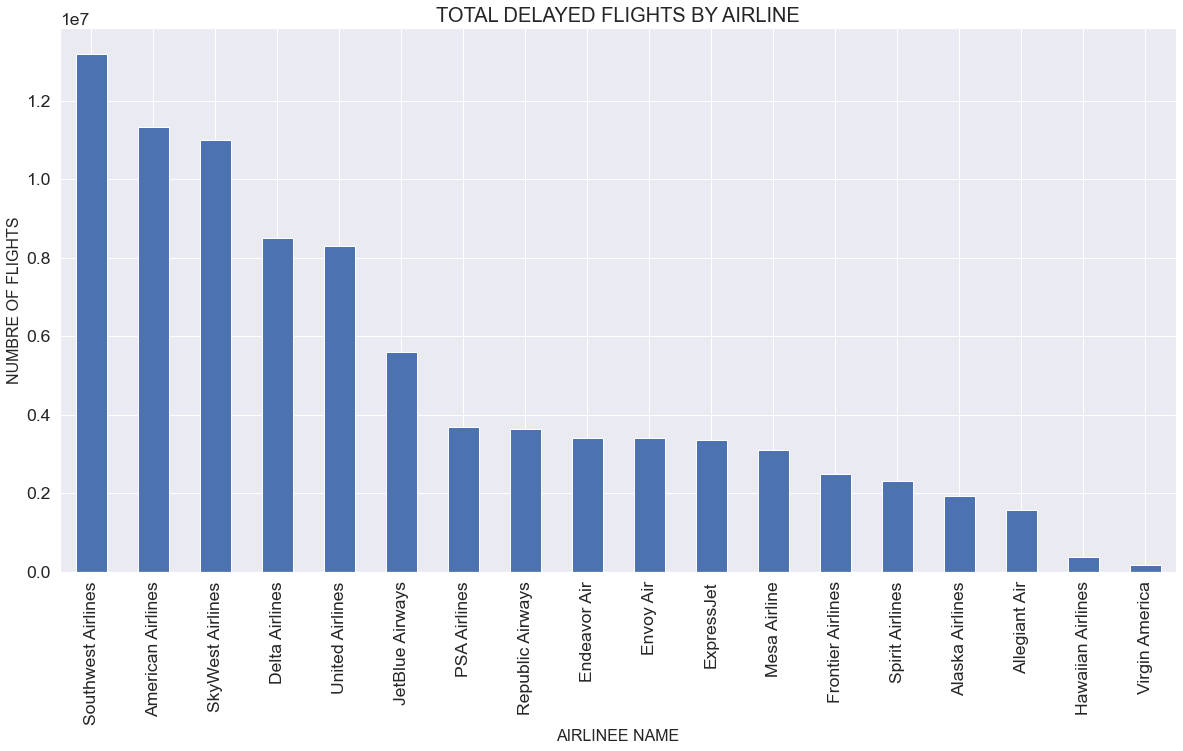

In [7]:
#Number of Delayed Flights by Airline
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [13]:
# 1. Creating the new dataframe with the columns of my interest
df1_PFD = df1[['OP_CARRIER', 'ARR_DELAY']]
df1_PFD.head()

,OP_CARRIER,ARR_DELAY
0,United Airlines,129.0
1,United Airlines,73.0
2,United Airlines,55.0
3,United Airlines,25.0
4,United Airlines,29.0


In [14]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df1_PFD.shape

(1351282, 2)

In [15]:
# 3. Non-normalize value_count()
df1_PFD.ARR_DELAY.value_counts()

15.0      47469
16.0      44841
17.0      42020
18.0      39877
19.0      37127
          ...  
1417.0        1
1228.0        1
1123.0        1
1390.0        1
1271.0        1
Name: ARR_DELAY, Length: 1410, dtype: int64

In [19]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df1_PFD.groupby(['OP_CARRIER']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['ARR_DELAY']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'ARR_DELAY': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)


# 8. Display the entire dataframe
df_fp.head(20)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,1942070.0,40272,4822.38
1,Allegiant Air,1565764.0,21231,7374.90
2,American Airlines,11336457.0,180794,6270.37
3,Delta Airlines,8506505.0,130189,6533.97
4,Endeavor Air,3408260.0,43660,7806.37
5,Envoy Air,3399699.0,56828,5982.44
6,ExpressJet,3355076.0,41469,8090.56
7,Frontier Airlines,2504459.0,34229,7316.78
8,Hawaiian Airlines,388220.0,8630,4498.49
9,JetBlue Airways,5596192.0,81308,6882.71


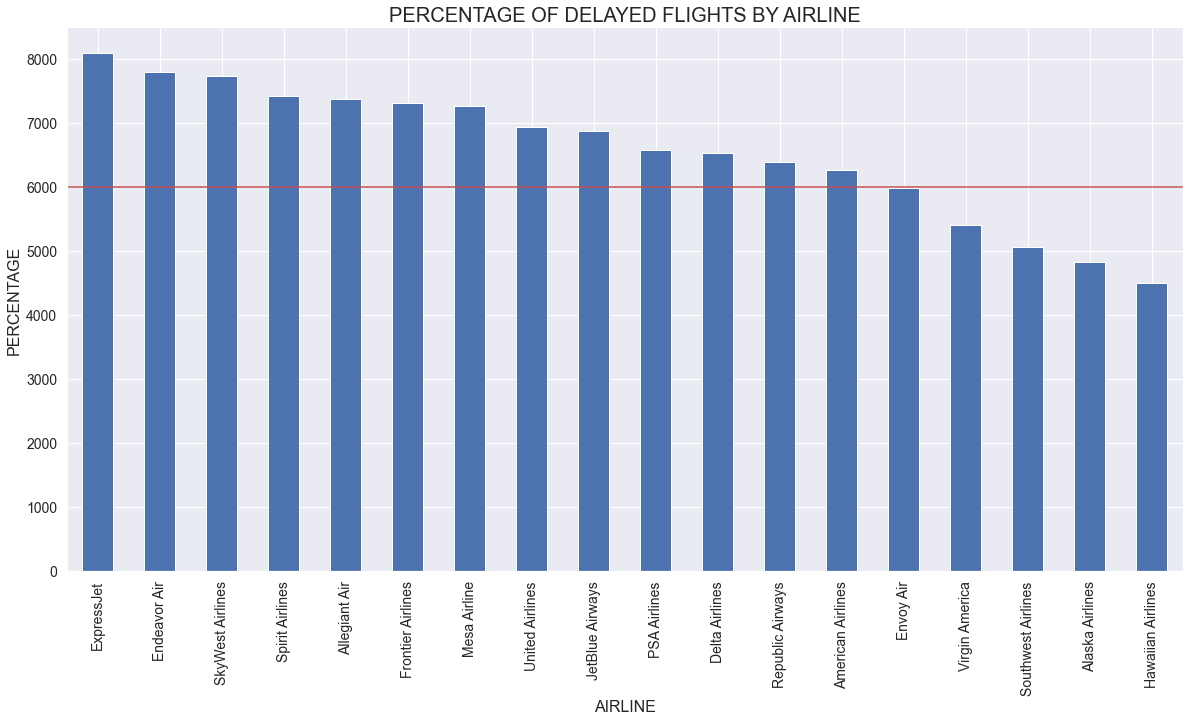

In [26]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=6000.1, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

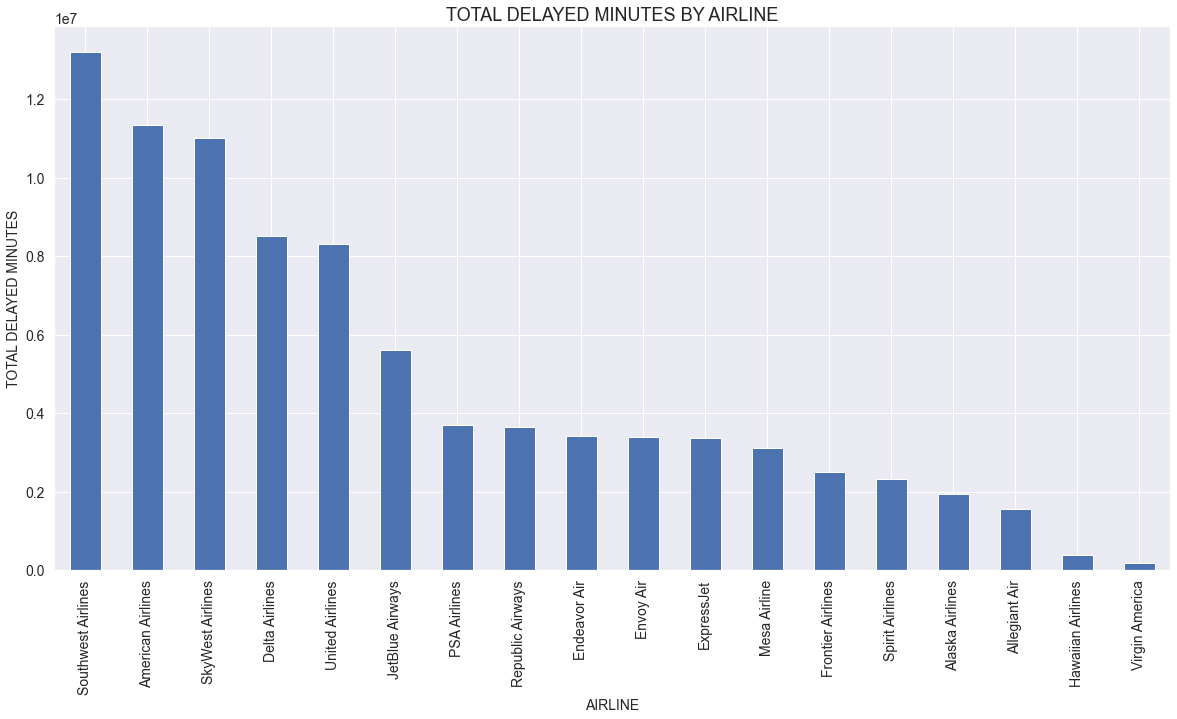

In [27]:
#Total Minutes Delayed by Airline
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [28]:
df1.head(2)

,Unnamed: 0.1,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY,DAY,MONTH,MONTH_AB
0,11,2018-01-01,United Airlines,Chicago,Cleveland,4,121.0,24.0,4,1,8.0,4,129.0,72.0,80.0,48.0,316.0,0.0,1,1,Jan
1,14,2018-01-01,United Airlines,Chicago,Burlington,4,76.0,14.0,4,1,5.0,1,73.0,121.0,118.0,99.0,763.0,11.0,1,1,Jan


In [29]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,OP_CARRIER,AVG_DELAY
0,Hawaiian Airlines,44.984936
1,Alaska Airlines,48.223828
2,Southwest Airlines,50.665543
3,Virgin America,54.026163
4,Envoy Air,59.824365
5,American Airlines,62.703724
6,Republic Airways,63.881865
7,Delta Airlines,65.339660
8,PSA Airlines,65.738390
9,JetBlue Airways,68.827077


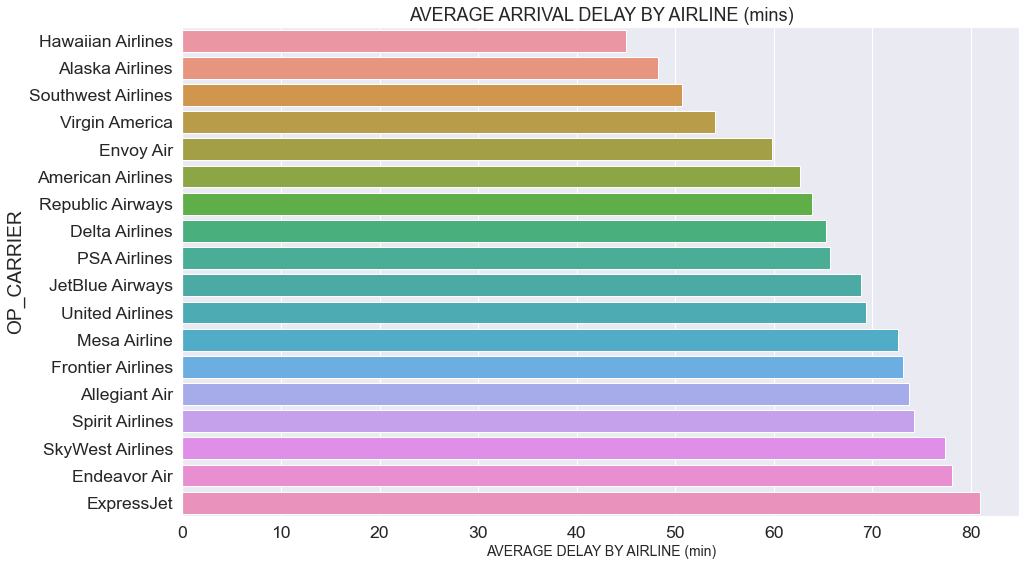

In [30]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

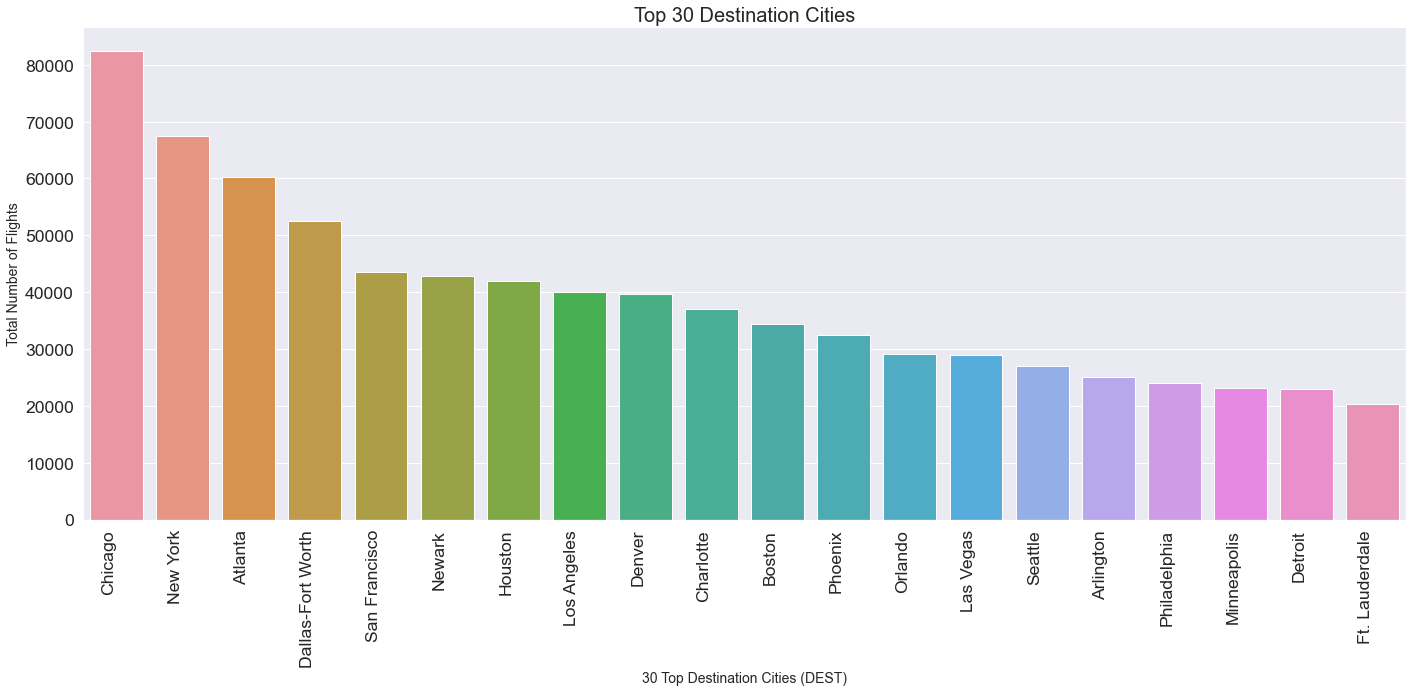

In [31]:
#20 Most Common Destination (Cities)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

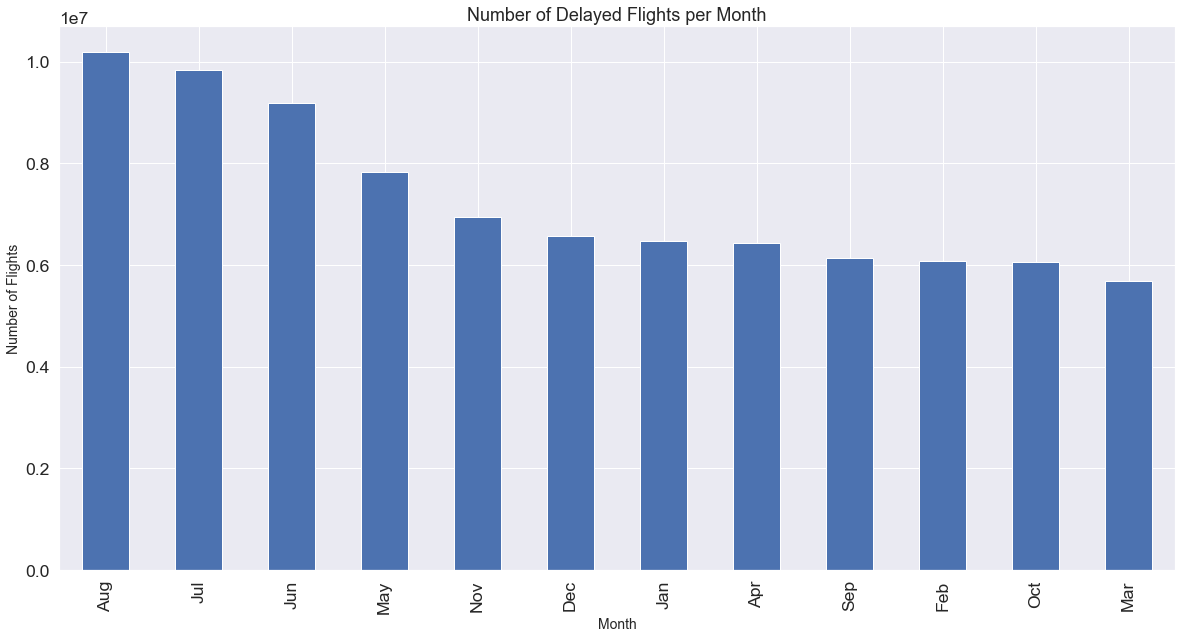

In [33]:
#Worse & Best months to travel based on flight delays
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

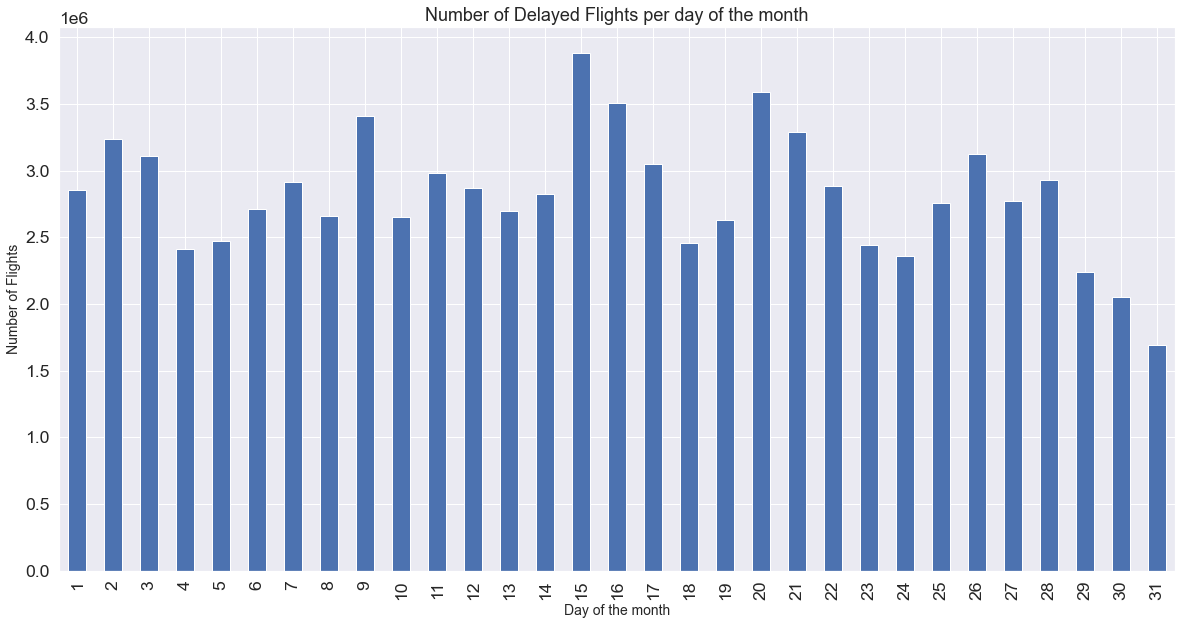

In [35]:
#Is there a better day to travel?
plt.figure(figsize=(20, 10))
df1.groupby('DAY').ARR_DELAY.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

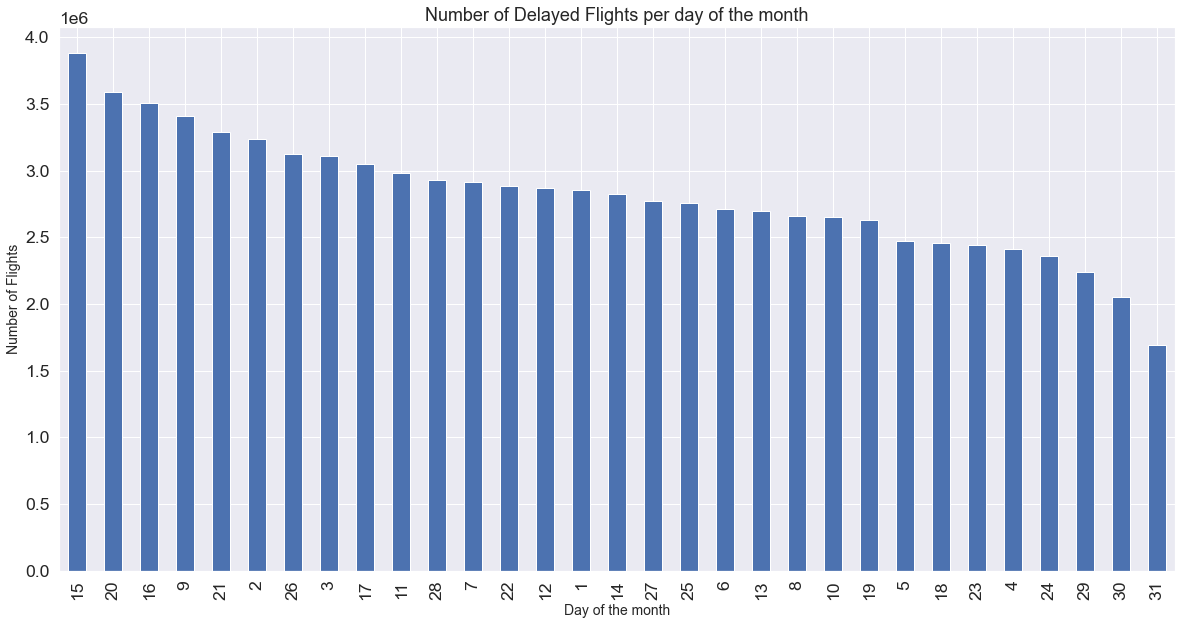

In [37]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In [39]:
#Impact of Delays (Departure vs. Arrival Delay)
a, b = len(df1), len(df1[df1.ARR_DELAY > df1.DEP_DELAY])
print(f'Arrival delay is greater than departure delay in {b} of {a} flights ({b/a*100}%).')
print(f'In other words, in {100 - b/a*100}% of flights, the delay happens before the plane has left the gate. Origin airport factors are more significant than destination airport factors.')

Arrival delay is greater than departure delay in 676609 of 1351282 flights (50.07163567634291%).
In other words, in 49.92836432365709% of flights, the delay happens before the plane has left the gate. Origin airport factors are more significant than destination airport factors.


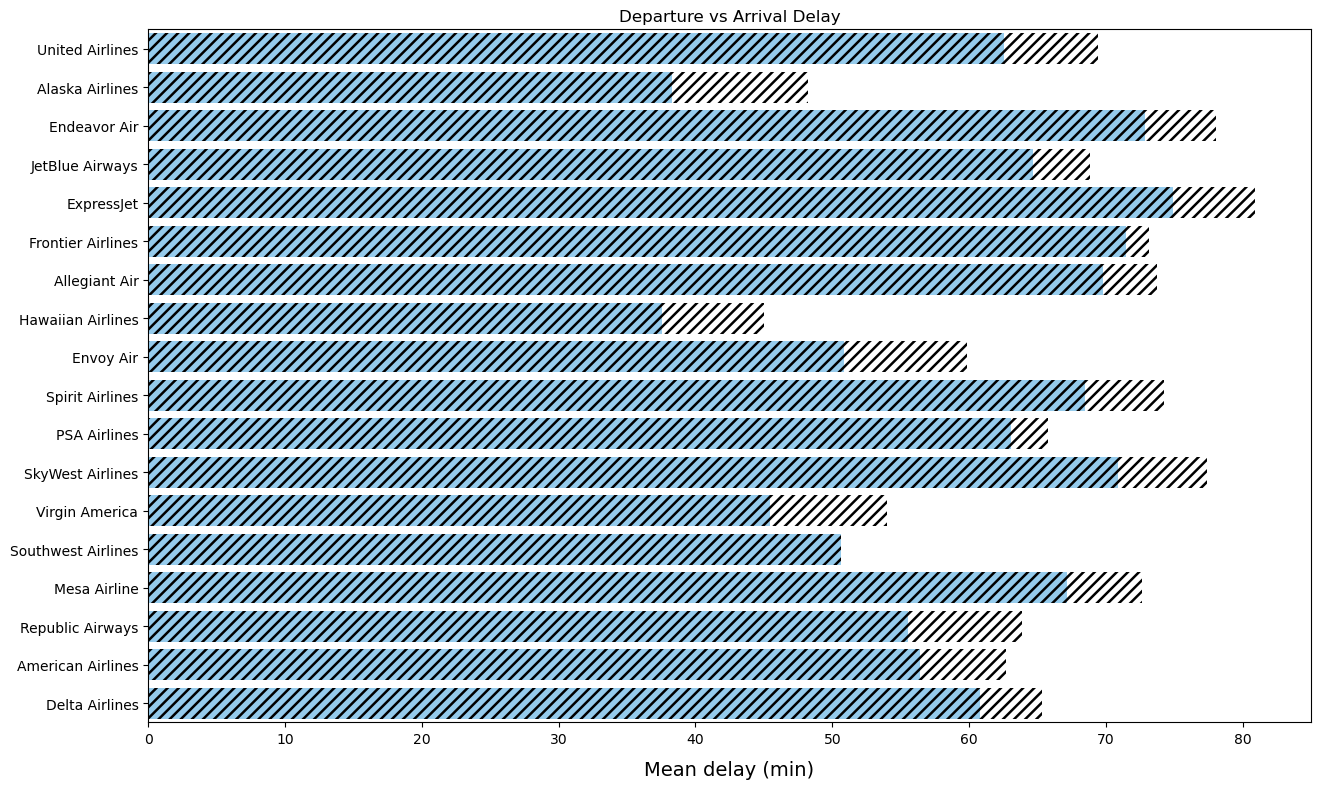

In [40]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

In [41]:
#Most Popular Destination with Average Arrival Delays
df1.head()

,Unnamed: 0.1,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY,DAY,MONTH,MONTH_AB
0,11,2018-01-01,United Airlines,Chicago,Cleveland,4,121.0,24.0,4,1,8.0,4,129.0,72.0,80.0,48.0,316.0,0.0,1,1,Jan
1,14,2018-01-01,United Airlines,Chicago,Burlington,4,76.0,14.0,4,1,5.0,1,73.0,121.0,118.0,99.0,763.0,11.0,1,1,Jan
2,15,2018-01-01,United Airlines,Orlando,Los Angeles,2,54.0,14.0,2,2,22.0,2,55.0,337.0,338.0,302.0,2218.0,0.0,1,1,Jan
3,16,2018-01-01,United Airlines,Newark,Sacramento,4,72.0,16.0,4,4,4.0,4,25.0,386.0,339.0,319.0,2500.0,0.0,1,1,Jan
4,17,2018-01-01,United Airlines,Ft. Myers,Newark,3,47.0,12.0,3,3,6.0,3,29.0,167.0,149.0,131.0,1068.0,0.0,1,1,Jan


In [42]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head(10)

,DEST,ARR_DELAY
0,AZA,72.008689
1,Aberdeen,112.848837
2,Abilene,56.170940
3,Adak,39.437500
4,Agana,42.402299
5,Aguadilla,61.279732
6,Akron,72.050259
7,Albany,61.549196
8,Albuquerque,53.653467
9,Alexandria,60.435572


In [43]:
test_4.shape

(343, 2)

In [44]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DEST,FLIGHTS
0,Chicago,82469
1,New York,67475
2,Atlanta,60297
3,Dallas-Fort Worth,52583
4,San Francisco,43591
5,Newark,42911
6,Houston,41900
7,Los Angeles,40015
8,Denver,39624
9,Charlotte,37043


In [45]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()


,DEST,FLIGHTS,ARR_DELAY
0,Chicago,82469,72.849071
1,New York,67475,75.535324
2,Atlanta,60297,68.403469
3,Dallas-Fort Worth,52583,72.928988
4,San Francisco,43591,69.051479


In [46]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,30.000000,30.000000
mean,30676.100000,64.145697
std,17648.332713,7.188144
min,12108.000000,51.779401
25%,15844.000000,58.135929
50%,26041.000000,64.296491
75%,39917.250000,68.889476
max,82469.000000,76.242176


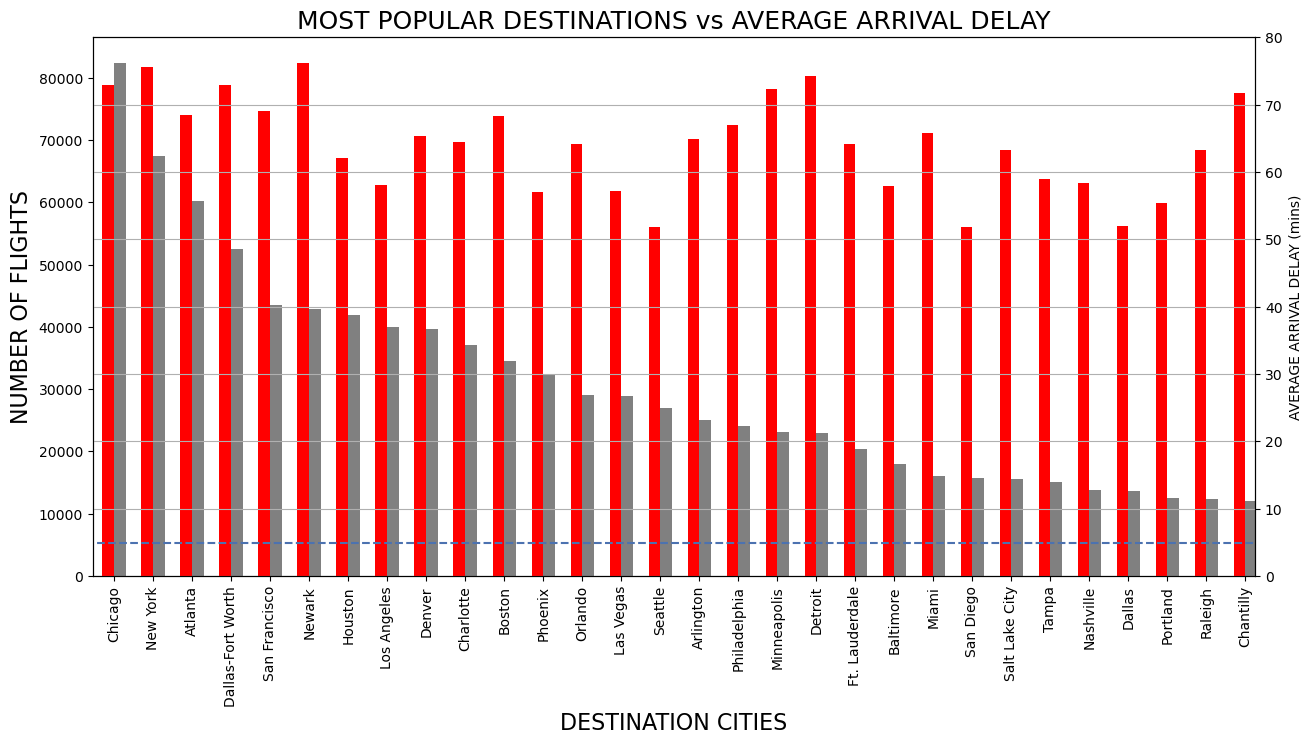

In [47]:
test_4_5 = test_4_5.set_index('DEST')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARR_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

In [48]:
#Departure Cities with the most Delayed Departure Flights
df1.head()

,Unnamed: 0.1,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY,DAY,MONTH,MONTH_AB
0,11,2018-01-01,United Airlines,Chicago,Cleveland,4,121.0,24.0,4,1,8.0,4,129.0,72.0,80.0,48.0,316.0,0.0,1,1,Jan
1,14,2018-01-01,United Airlines,Chicago,Burlington,4,76.0,14.0,4,1,5.0,1,73.0,121.0,118.0,99.0,763.0,11.0,1,1,Jan
2,15,2018-01-01,United Airlines,Orlando,Los Angeles,2,54.0,14.0,2,2,22.0,2,55.0,337.0,338.0,302.0,2218.0,0.0,1,1,Jan
3,16,2018-01-01,United Airlines,Newark,Sacramento,4,72.0,16.0,4,4,4.0,4,25.0,386.0,339.0,319.0,2500.0,0.0,1,1,Jan
4,17,2018-01-01,United Airlines,Ft. Myers,Newark,3,47.0,12.0,3,3,6.0,3,29.0,167.0,149.0,131.0,1068.0,0.0,1,1,Jan


In [49]:
test_6 = df1[['ORIGIN', 'DEP_DELAY']]
test_6 = test_6.groupby(['ORIGIN']).mean().reset_index()
test_6.head(10)

,ORIGIN,DEP_DELAY
0,AZA,58.865909
1,Aberdeen,95.663158
2,Abilene,58.335938
3,Adak,51.678571
4,Agana,66.537037
5,Aguadilla,73.006522
6,Akron,76.510494
7,Albany,61.580700
8,Albuquerque,57.706833
9,Alexandria,71.144599


In [50]:
test_7 = df1.ORIGIN.value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN,FLIGHTS
0,Chicago,101580
1,Atlanta,64019
2,Dallas-Fort Worth,61893
3,New York,61599
4,Charlotte,48972
5,Denver,46380
6,Houston,42448
7,San Francisco,39008
8,Los Angeles,37393
9,Newark,34753


In [51]:
test_6_7 = pd.merge(test_7, test_6, on='ORIGIN')
test_6_7.head()

,ORIGIN,FLIGHTS,DEP_DELAY
0,Chicago,101580,54.237793
1,Atlanta,64019,58.587872
2,Dallas-Fort Worth,61893,58.532451
3,New York,61599,64.170084
4,Charlotte,48972,53.438679


In [52]:
test_6_7.shape

(30, 3)

In [53]:
test_6_7.describe()

,FLIGHTS,DEP_DELAY
count,30.00000,30.000000
mean,31959.20000,58.173812
std,19979.67293,5.179181
min,12618.00000,45.504301
25%,17178.25000,54.666558
50%,25375.50000,58.208901
75%,38604.25000,61.582173
max,101580.00000,67.157798


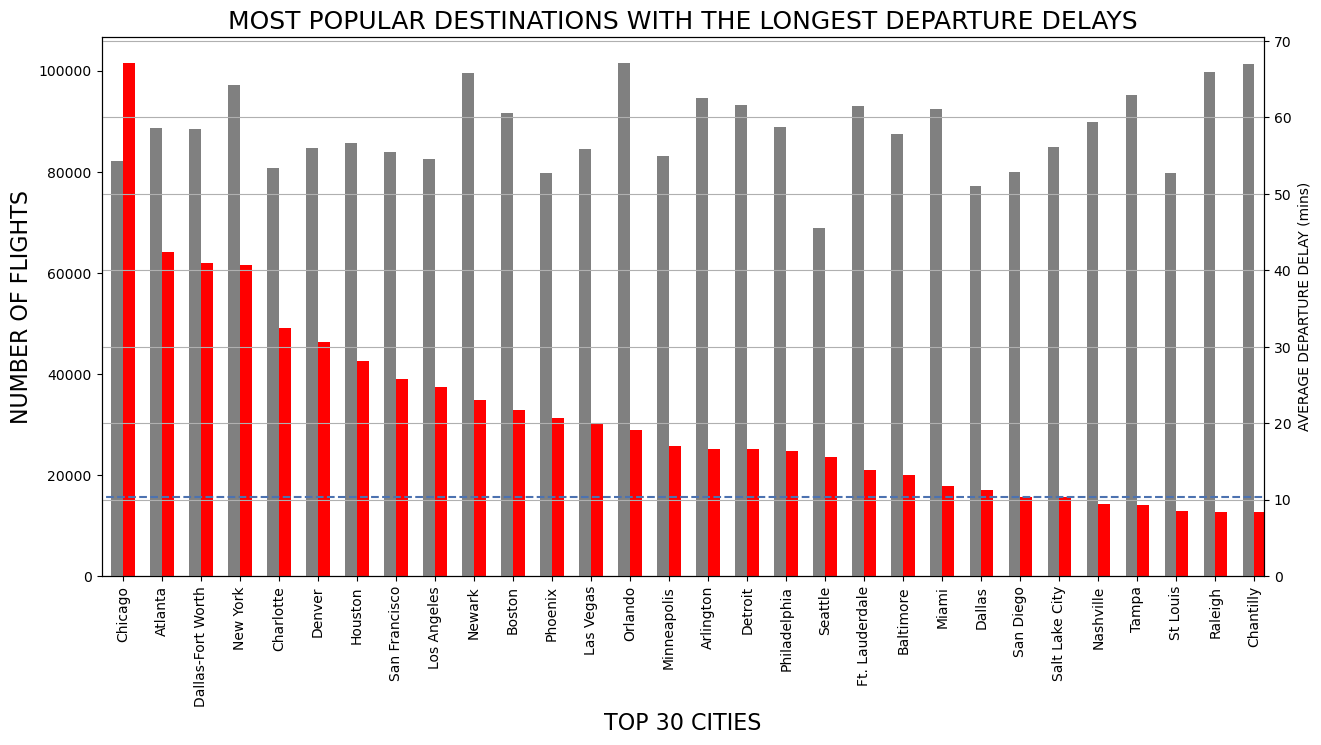

In [54]:
test_6_7 = test_6_7.set_index('ORIGIN')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEP_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

In [55]:
#Number of Destinations by Airline
cities = df1[['OP_CARRIER', 'DEST', 'ARR_DELAY']]
cities = cities.groupby(['OP_CARRIER', 'DEST']).mean().reset_index()

In [56]:
cities.OP_CARRIER.value_counts()

SkyWest Airlines      250
Envoy Air             150
Delta Airlines        148
ExpressJet            138
Endeavor Air          129
Allegiant Air         125
Mesa Airline          118
United Airlines       113
American Airlines     106
Republic Airways      104
PSA Airlines           99
Frontier Airlines      94
Southwest Airlines     85
Alaska Airlines        75
JetBlue Airways        70
Spirit Airlines        44
Virgin America         27
Hawaiian Airlines      18
Name: OP_CARRIER, dtype: int64

In [57]:
temp = cities[(cities['OP_CARRIER'] == "Delta Airlines")]

In [58]:
temp.head()

,OP_CARRIER,DEST,ARR_DELAY
306,Delta Airlines,Akron,58.691358
307,Delta Airlines,Albany,54.550296
308,Delta Airlines,Albuquerque,64.509554
309,Delta Airlines,Allentown,67.171429
310,Delta Airlines,Anchorage,45.252125


In [59]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 148.
temp.DEST.nunique()

148

In [60]:
cities_airline = cities.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,OP_CARRIER,NUMBER_CITIES
0,SkyWest Airlines,250
1,Envoy Air,150
2,Delta Airlines,148
3,ExpressJet,138
4,Endeavor Air,129
5,Allegiant Air,125
6,Mesa Airline,118
7,United Airlines,113
8,American Airlines,106
9,Republic Airways,104


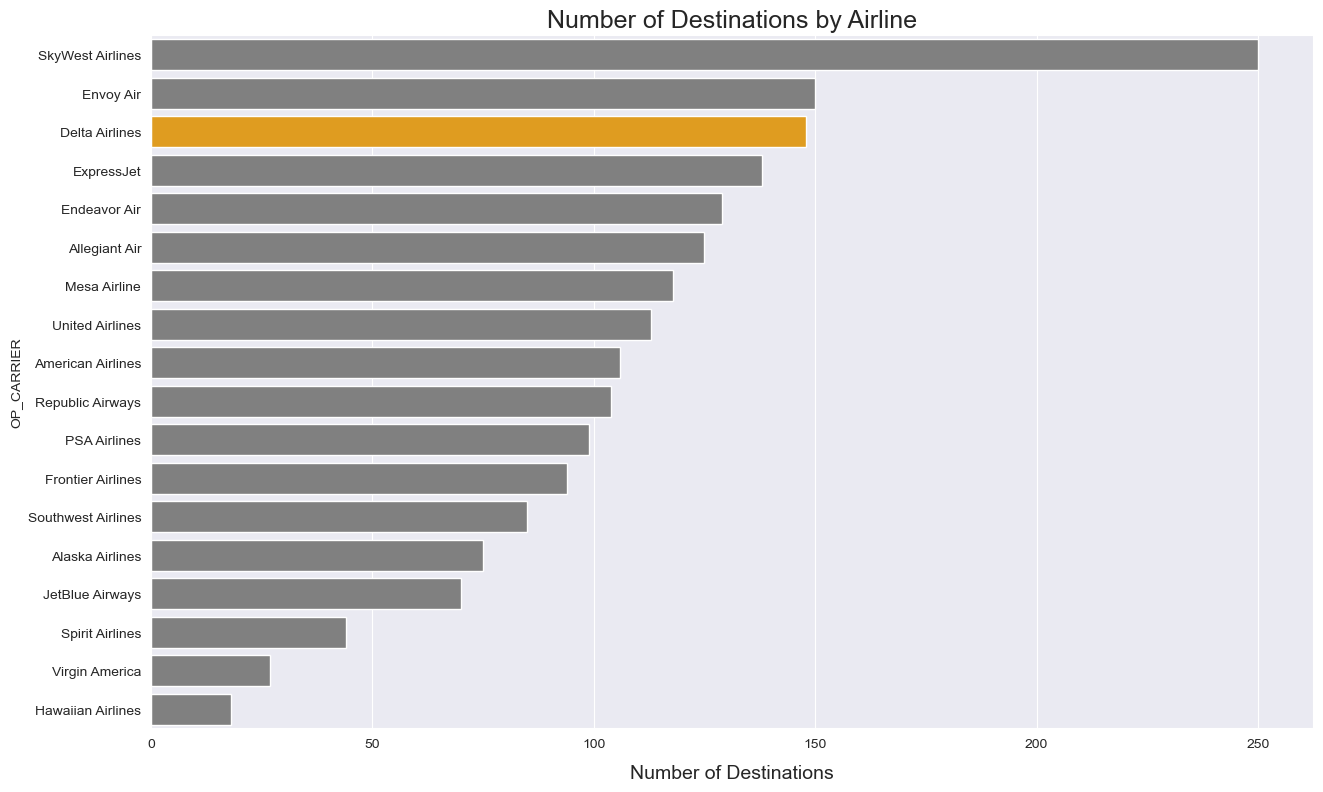

In [61]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [62]:
df1.columns

Index(['Unnamed: 0.1', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WEATHER_DELAY', 'DAY',
       'MONTH', 'MONTH_AB'],
      dtype='object')

In [63]:
df1['ARR-DEP_DELAY'] = df1['ARR_DELAY'] - df1['DEP_DELAY']
df1.head(3).append(df1.tail(3))

,Unnamed: 0.1,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY,DAY,MONTH,MONTH_AB,ARR-DEP_DELAY
0,11,2018-01-01,United Airlines,Chicago,Cleveland,4,121.0,24.0,4,1,8.0,4,129.0,72.0,80.0,48.0,316.0,0.0,1,1,Jan,8.0
1,14,2018-01-01,United Airlines,Chicago,Burlington,4,76.0,14.0,4,1,5.0,1,73.0,121.0,118.0,99.0,763.0,11.0,1,1,Jan,-3.0
2,15,2018-01-01,United Airlines,Orlando,Los Angeles,2,54.0,14.0,2,2,22.0,2,55.0,337.0,338.0,302.0,2218.0,0.0,1,1,Jan,1.0
1351279,7213417,2018-12-31,American Airlines,Des Moines,Phoenix,2,0.0,28.0,2,2,33.0,2,16.0,219.0,235.0,174.0,1149.0,0.0,31,12,Dec,16.0
1351280,7213429,2018-12-31,American Airlines,Charlotte,Detroit,3,48.0,15.0,3,4,11.0,4,33.0,116.0,101.0,75.0,500.0,0.0,31,12,Dec,-15.0
1351281,7213433,2018-12-31,American Airlines,Philadelphia,Charlotte,1,14.0,39.0,1,2,4.0,2,29.0,104.0,119.0,76.0,449.0,0.0,31,12,Dec,15.0


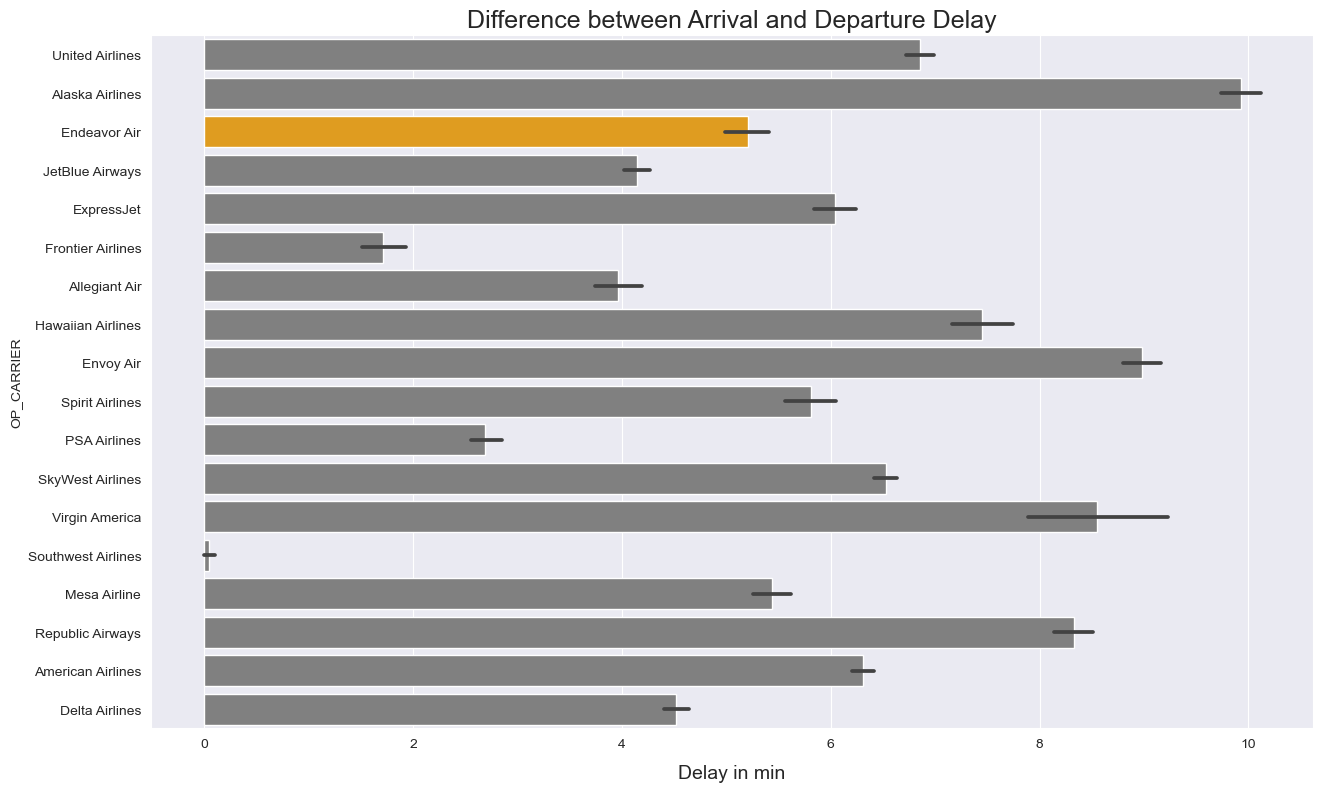

In [64]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="OP_CARRIER", data=df1, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay in min', fontsize=14, labelpad=10);
plt.show()

In [65]:
#Visualizations - Sub-Plots
df2 = pd.merge(df_fp, test_3, on='OP_CARRIER')
df2 = pd.merge(df2, cities_airline, on='OP_CARRIER')
df2.head(3)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES
0,Alaska Airlines,1942070.0,40272,4822.38,48.223828,75
1,Allegiant Air,1565764.0,21231,7374.90,73.748952,125
2,American Airlines,11336457.0,180794,6270.37,62.703724,106


In [66]:
test_8 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_8.head(2)

,OP_CARRIER,ARR_DELAY
0,United Airlines,129.0
1,United Airlines,73.0


In [67]:
test_8.shape

(1351282, 2)

In [68]:
test_8 = test_8.groupby('OP_CARRIER').sum().sort_values(by=['ARR_DELAY']).reset_index()
test_8.rename({'ARR_DELAY': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)

In [69]:
df2 = pd.merge(df2, test_8, on='OP_CARRIER')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
14,Southwest Airlines,13190774.0,260350,5066.55,50.665543,85,13190774.0
2,American Airlines,11336457.0,180794,6270.37,62.703724,106,11336457.0
13,SkyWest Airlines,11010386.0,142277,7738.70,77.386970,250,11010386.0
3,Delta Airlines,8506505.0,130189,6533.97,65.339660,148,8506505.0
16,United Airlines,8296437.0,119568,6938.68,69.386767,113,8296437.0
9,JetBlue Airways,5596192.0,81308,6882.71,68.827077,70,5596192.0
12,Republic Airways,3634942.0,56901,6388.19,63.881865,104,3634942.0
5,Envoy Air,3399699.0,56828,5982.44,59.824365,150,3399699.0
11,PSA Airlines,3691868.0,56160,6573.84,65.738390,99,3691868.0
4,Endeavor Air,3408260.0,43660,7806.37,78.063674,129,3408260.0


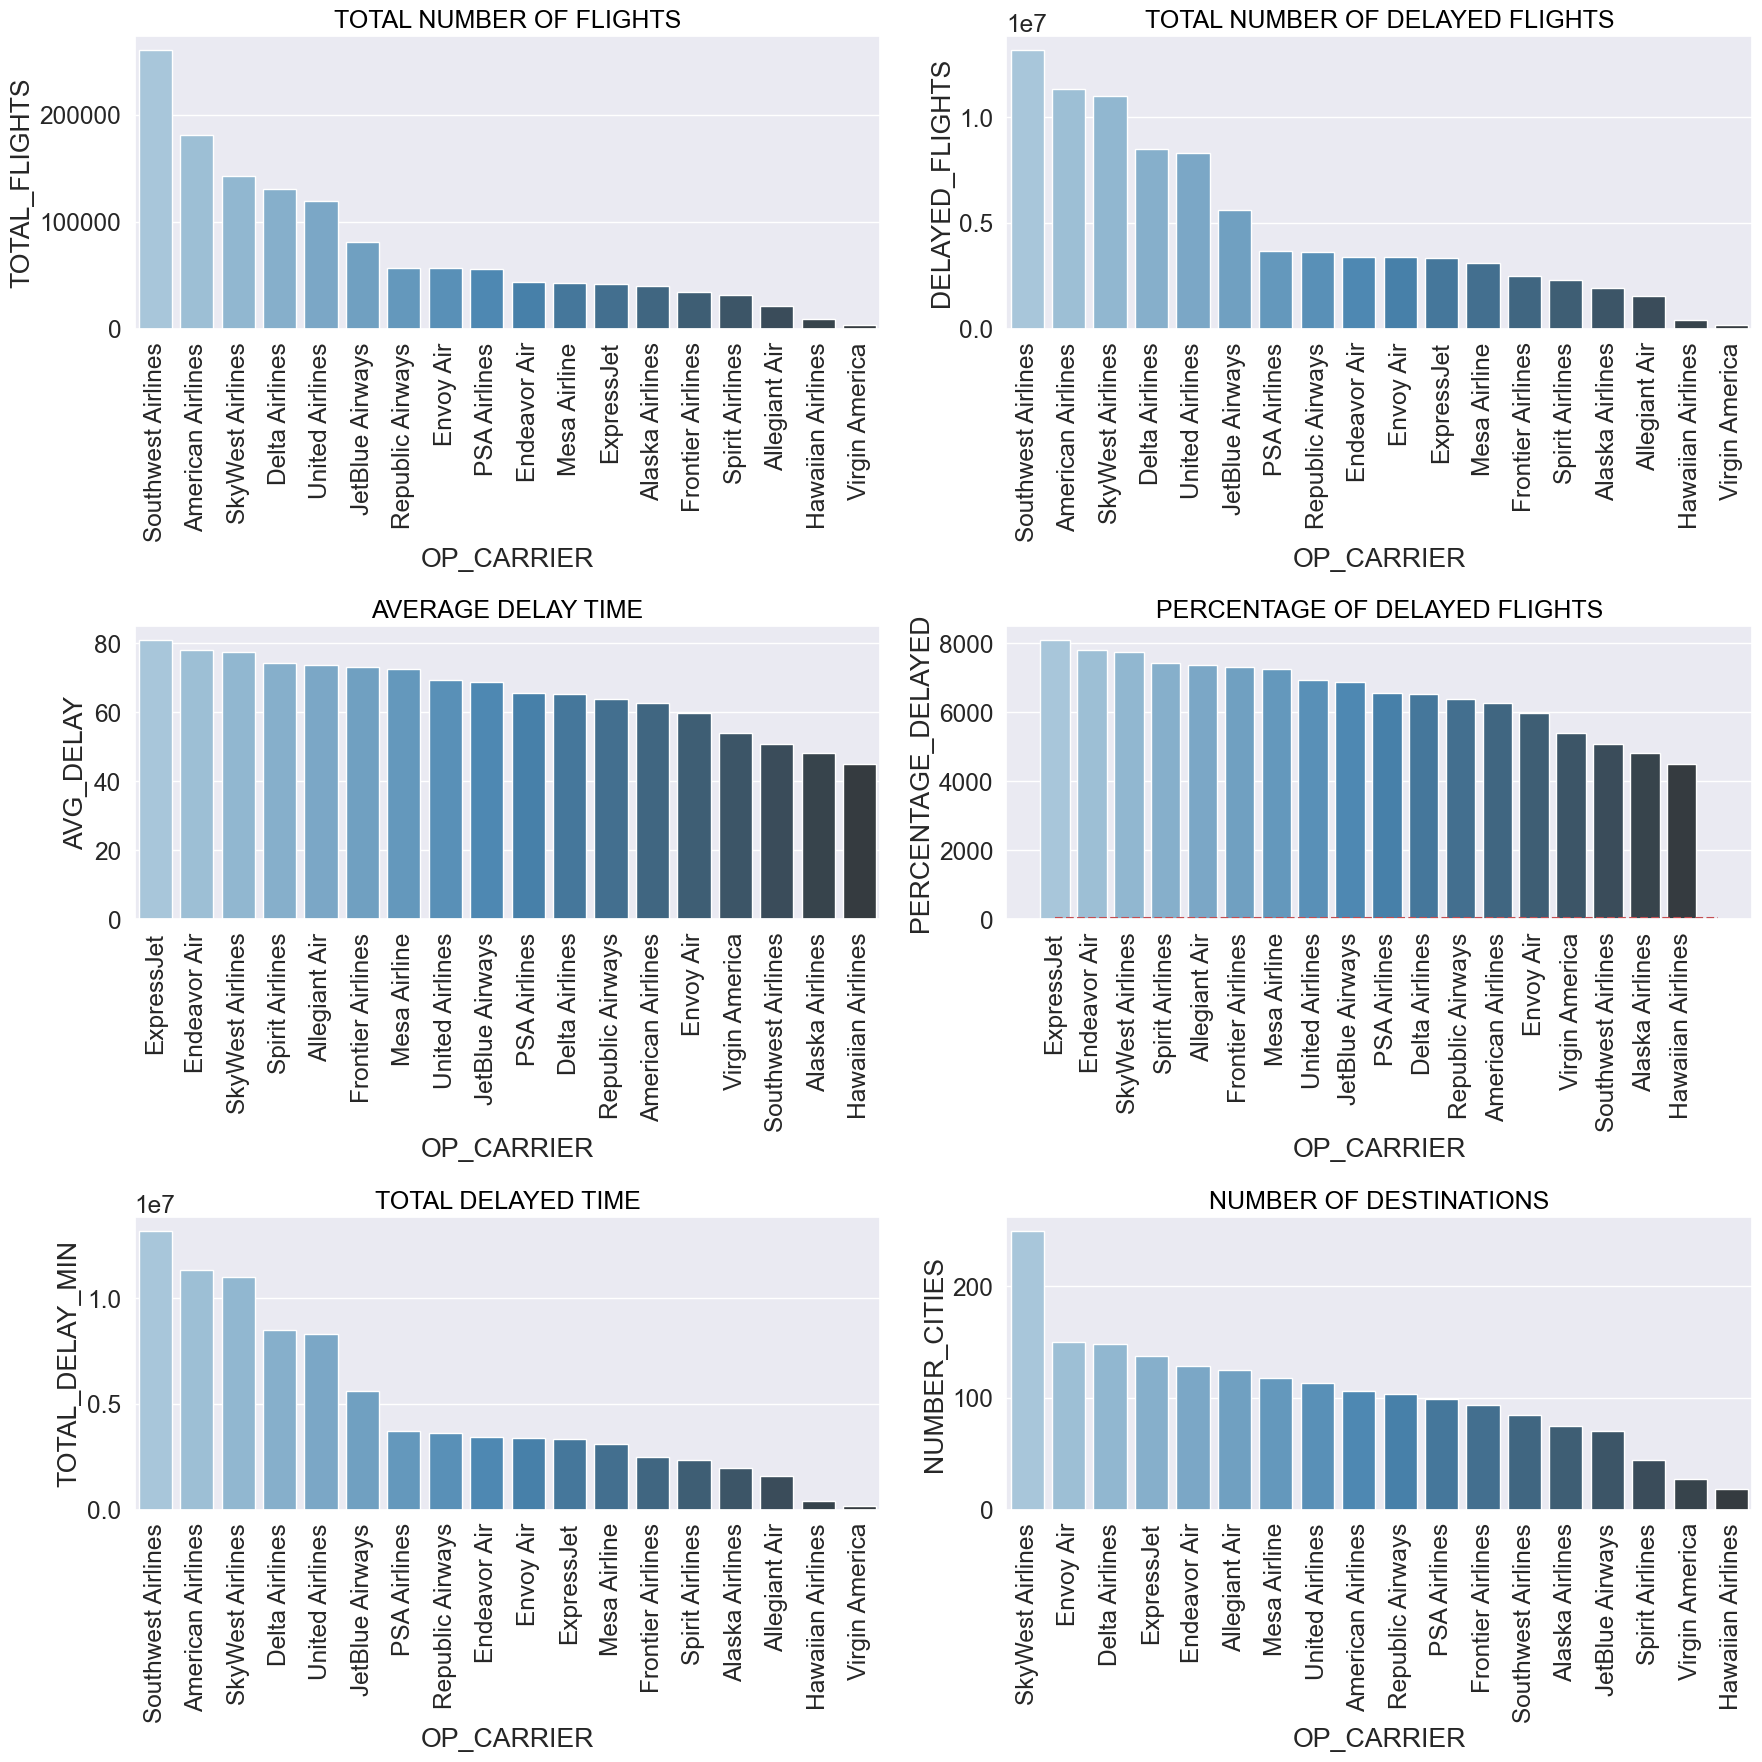

In [70]:
#highlight = "Delta Airlines"
#pos = df1.OP_CARRIER.get_loc(highlight)

fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('TOTAL NUMBER OF FLIGHTS', fontsize=18, color="black")
sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('TOTAL NUMBER OF DELAYED FLIGHTS', fontsize=18, color="black")
sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub2)
#sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('AVERAGE DELAY TIME', fontsize=18, color="black")
sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('PERCENTAGE OF DELAYED FLIGHTS', fontsize=18, color="black")
sub4 = sns.barplot(x="OP_CARRIER", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TOTAL DELAYED TIME', fontsize=18, color="black")
sub5 = sns.barplot(x="OP_CARRIER", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)

sub6 = fig.add_subplot(326)
sub6.set_title('NUMBER OF DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="OP_CARRIER", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()